# Applying Linear Regresson model

#### importing libraries

In [185]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt

### importing dataset

In [186]:
df = pd.read_csv("../datasets/co2_emissions_canada.csv")

In [187]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10310 entries, 0 to 10309
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              10310 non-null  object 
 1   Model                             10310 non-null  object 
 2   Vehicle Class                     10310 non-null  object 
 3   Engine Size(L)                    10310 non-null  float64
 4   Cylinders                         10310 non-null  int64  
 5   Transmission                      10310 non-null  object 
 6   Fuel Type                         10310 non-null  object 
 7   Fuel Consumption City (L/100 km)  10310 non-null  float64
 8   Fuel Consumption Hwy (L/100 km)   10310 non-null  float64
 9   Fuel Consumption Comb (L/100 km)  10310 non-null  float64
 10  Fuel Consumption Comb (mpg)       10310 non-null  int64  
 11  CO2 Emissions(g/km)               10310 non-null  int64  
dtypes: f

In [189]:
df.shape

(10310, 12)

In [190]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,10310.000000,10310.000000,10310.000000,10310.000000,10310.000000,10310.000000,10310.000000
mean,3.182114,5.631911,12.661154,9.070475,11.046130,27.342483,250.896993
std,1.361541,1.815693,3.574415,2.287943,2.962707,7.206633,58.833883
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,207.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.200000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


##### Renaming some attributes

In [191]:

df = df.rename(columns = {"Engine Size(L)": "EngineSize","Fuel Consumption City (L/100 km)": "City_(L/100km)", "Fuel Consumption Hwy (L/100 km)": "Highway_(L/100km)", "Fuel Consumption Comb (L/100 km)": "Combined-(L/100km)", "Fuel Consumption Comb (mpg)": "Combined(mpg)", "CO2 Emissions(g/km)": "Co2Emissions"})
df.head()


,Make,Model,Vehicle Class,EngineSize,Cylinders,Transmission,Fuel Type,City_(L/100km),Highway_(L/100km),Combined-(L/100km),Combined(mpg),Co2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Modeling
### * Correlation

In [192]:
print(df.corr())

                    EngineSize  Cylinders  City_(L/100km)  Highway_(L/100km)  \
EngineSize            1.000000   0.928297        0.828595           0.760921   
Cylinders             0.928297   1.000000        0.795950           0.711112   
City_(L/100km)        0.828595   0.795950        1.000000           0.950959   
Highway_(L/100km)     0.760921   0.711112        0.950959           1.000000   
Combined-(L/100km)    0.814344   0.775297        0.994083           0.978658   
Combined(mpg)        -0.765821  -0.726649       -0.929388          -0.891219   
Co2Emissions          0.852836   0.833209        0.913465           0.876774   

                    Combined-(L/100km)  Combined(mpg)  Co2Emissions  
EngineSize                    0.814344      -0.765821      0.852836  
Cylinders                     0.775297      -0.726649      0.833209  
City_(L/100km)                0.994083      -0.929388      0.913465  
Highway_(L/100km)             0.978658      -0.891219      0.876774  
Combined-

##### High Correlation found between Co2 Emmission and other variable that indicates good linear model.
#### We are interested in the relationship between Co2 emission and combine fuel consumption(L/100km) and combined consumption (mpg)

#### * Correlation by using scatter matirx plot

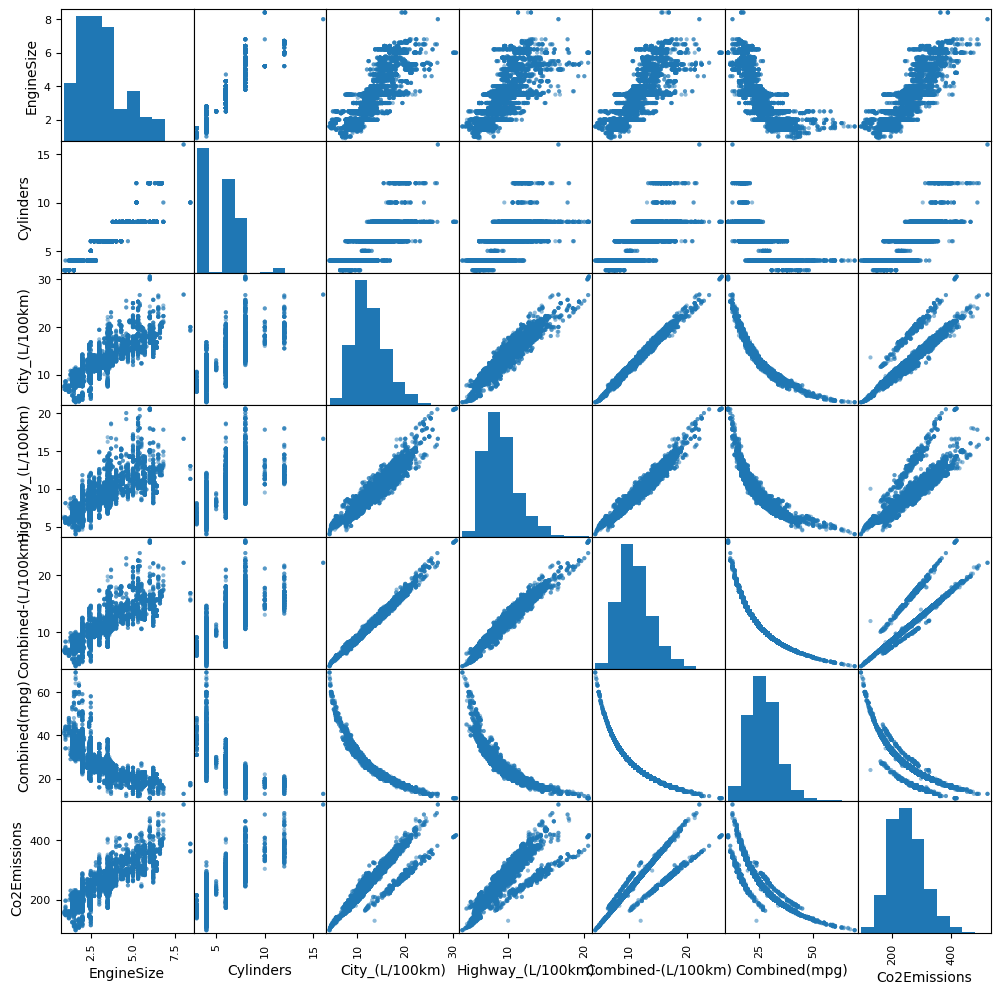

In [193]:
scatter_matrix(df, figsize=(12,12))
plt.show()
#plt.savefig("LinReg_co2.png")

+ Found descent linear regression between Co2 emission and other features.

### Preparing data

In [194]:
df.head()

,Make,Model,Vehicle Class,EngineSize,Cylinders,Transmission,Fuel Type,City_(L/100km),Highway_(L/100km),Combined-(L/100km),Combined(mpg),Co2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### ** Droping some attribute. My target variable is Co2Emission

In [196]:
X=df.drop(['Make', 'Model','Transmission', 'Fuel Type', 'Vehicle Class','Co2Emissions'], axis='columns')
y=df.Co2Emissions
X.head()

,EngineSize,Cylinders,City_(L/100km),Highway_(L/100km),Combined-(L/100km),Combined(mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [197]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Building Model

In [198]:
lr_model= LinearRegression()  
lr_model.fit(X_train, y_train)

LinearRegression()

In [199]:
print("Intercept: ", lr_model.intercept_)
print("Slope: ", lr_model.coef_)
print("R square: ", lr_model.score(X,y))

Intercept:  238.76580753732023
Slope:  [ 5.37349883  7.54953845 -2.45792528  2.43304087  5.46619374 -3.6119087 ]
R square:  0.8981350998660036


Though we have seen 2 negetive coefficent, R-square value is 0.898 which is promising.

### Cheking RMSE

In [200]:
yhat = lr_model.predict(X_test)
print(mean_squared_error(y_test, yhat, squared=False))

18.254100098734245


### * Polynomial Regression

#### Now, we are considering EngineSize to do this calculation

In [209]:
X['EngineSize'] = np.square(df.EngineSize)
X.head()

,EngineSize,Cylinders,City_(L/100km),Highway_(L/100km),Combined-(L/100km),Combined(mpg)
0,4.00,4,9.9,6.7,8.5,33
1,5.76,4,11.2,7.7,9.6,29
2,2.25,4,6.0,5.8,5.9,48
3,12.25,6,12.7,9.1,11.1,25
4,12.25,6,12.1,8.7,10.6,27


In [208]:
p_model= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
p_model.fit(X_train, y_train)
yhat = p_model.predict(X_test)


print('R squared:', p_model.score(X,y))
print('RMSE', mean_squared_error(y_test, yhat, squared=False))


R squared: 0.9003189081362316
RMSE 18.05211896152715


RMSE was 18.254100098734245, now it is 18.05211896152715. Gone down.
R square was  0.8981350998660036. now it is 0.9003189081362316


In [206]:
yhat = lr_model.predict(X_test)
print(mean_squared_error(y_test, yhat, squared=False))

68.4251852958195
